In [288]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/nlp_founder/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [23]:
vc_invest1 = pd.read_csv("../data/processed/PitchBook_CA_VCInvest=1_NLP-features.csv")

In [24]:
vc_invest0 = pd.read_csv("../data/processed/PitchBook_CA_VCInvest=0_NLP-features.csv")

In [25]:
vc_invest1.head(2)

,Unnamed: 0,Unnamed: 0.1,Company ID,Description,Company Name,HQ Post Code,Primary Industry Code,Primary Contact,Year Founded,Active Investors,...,anger,disgust,fear,joy,sadness,agreeableness_big5,conscientiousness_big5,emotional_range_big5,extraversion_big5,openness_big5
0,0,0,61743-97,Developer of an online advertisement platform ...,ZypMedia,94102,Social/Platform Software,Mark Goldman,2013.0,"Sinclair Broadcast Group, Sinclair Digital Ven...",...,0.037795,0.056217,0.033382,0.331294,0.248749,0.770552,0.554384,0.463544,0.771254,0.440335
1,1,6,62229-34,"Developer of animated, interactive learning ma...",Zyante,95031,Publishing,Smita Bakshi,2012.0,"Bialla Venture Partners, National Science Foun...",...,0.076046,0.045468,0.053601,0.532597,0.353646,0.608447,0.346789,0.447831,0.567102,0.228463


In [26]:
vc_invest1['vc_invest'] = vc_invest1.VC_invested

In [27]:
vc_invest1.drop('VC_invested',axis=1, inplace=True) # make the columns match

In [28]:
vc_invest0 .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 38 columns):
Unnamed: 0                     92 non-null int64
Unnamed: 0.1                   92 non-null int64
Company ID                     92 non-null object
Description                    92 non-null object
Company Name                   92 non-null object
HQ Post Code                   92 non-null int64
Primary Industry Code          92 non-null object
Primary Contact                92 non-null object
Year Founded                   92 non-null float64
Active Investors               56 non-null object
HQ Location                    92 non-null object
Growth Rate                    92 non-null float64
Size Multiple                  92 non-null float64
Last Financing Date            92 non-null object
Last Financing Size            92 non-null float64
Last Financing Valuation       17 non-null float64
Last Financing Deal Type 2     54 non-null object
Majestic Referring Domains     92 non-null fl

In [29]:
vc_invest0['Primary Industry Code'].unique() #  one hot encode this

array(['Network Management Software', 'Electronics (B2C)',
       'Other Business Products and Services', 'Internet Retail',
       'Therapeutic Devices', 'Social/Platform Software',
       'Application Software', 'Social Content', 'Human Capital Services',
       'Automotive', 'Movies, Music and Entertainment',
       'Real Estate Services (B2C)', 'Other Healthcare Services',
       'Other Healthcare Technology Systems', 'Other Commercial Services',
       'Information Services (B2C)', 'Consulting Services (B2B)',
       'Other Software', 'Other Consumer Products and Services',
       'Business/Productivity Software', 'Other Financial Services',
       'Entertainment Software', 'Other Energy Services',
       'Other Consumer Durables', 'Aerospace and Defense',
       'Broadcasting, Radio and Television', 'Leisure Facilities',
       'Wireless Service Providers', 'Legal Services (B2C)',
       'Educational and Training Services (B2C)',
       'Media and Information Services (B2B)',
   

# Combine dataframes

In [30]:
combo_df = pd.concat(objs=[vc_invest0,vc_invest1])

In [31]:
combo_df.tail()

,Active Investors,Company ID,Company Name,Description,Employees,Facebook Likes,Growth Rate,HQ Location,HQ Post Code,Last Financing Date,...,days_since_offer,disgust,emotional_range_big5,extraversion_big5,fear,joy,openness_big5,sadness,tentative,vc_invest
161,"Anjan Mitra, Dorm Room Fund, Emily Mitra, Erik...",106663-87,Traveling Spoon,Developer of an online platform designed to bo...,2.0,19126.0,0.416151,"San Francisco, CA",94110,2015-09-17,...,NaN,0.047489,0.703120,0.890312,0.044991,0.693290,0.630364,0.088702,0.460577,1
162,"Accel, New Enterprise Associates",167364-55,TravelBank,Developer of travel and expense software for s...,11.0,916.0,4.039472,"San Francisco, CA",94107,2016-10-20,...,NaN,0.057233,0.811919,0.889738,0.054336,0.606031,0.136577,0.099967,0.072408,1
163,NaN,58446-37,Translucent Medical,Provider of a navigation system for reducing X...,27.0,1135.0,0.042641,"Santa Cruz, CA",95060,NaN,...,NaN,0.084686,0.765961,0.665861,0.105098,0.581602,0.399683,0.464961,0.380504,1
164,"Amplify.LA, Canyon Creek Capital, HillsVen Cap...",90366-58,Translation Exchange,Provider of a cloud-based platform for continu...,11.0,200.0,3.822225,"San Francisco, CA",94105,2016-03-01,...,NaN,0.248178,0.750920,0.300239,0.127519,0.298173,0.264759,0.369778,0.689846,1
165,"1776, Alex Bresler, BallstonBID LaunchPad, Bru...",95609-35,TransitScreen,Provider of a real-time transportation display...,18.0,774.0,0.135018,"Washington, DC",20005,2017-02-24,...,NaN,0.082909,0.575228,0.623034,0.094825,0.481402,0.468479,0.445690,0.346413,1


In [32]:
combo_df.head()

,Active Investors,Company ID,Company Name,Description,Employees,Facebook Likes,Growth Rate,HQ Location,HQ Post Code,Last Financing Date,...,days_since_offer,disgust,emotional_range_big5,extraversion_big5,fear,joy,openness_big5,sadness,tentative,vc_invest
0,"500 Startups, Start Smart Labs",170123-59,Zyudly Labs,Provider of cyber-security analytics and intel...,7.0,103.0,0.118048,"Palo Alto, CA",94306,2017-02-08,...,121.0,0.100205,0.733407,0.632116,0.377408,0.514982,0.410378,0.283647,0.274317,0
1,eLab Accelerator,123484-96,Zunn Labs,Developer of application controlled LED lights...,7.0,846.0,-0.021589,"Los Angeles, CA",90025,2014-12-20,...,902.0,0.049665,0.779365,0.711512,0.145806,0.339845,0.164799,0.363050,0.319869,0
2,NaN,170046-01,Zuma 4 Productions,The company is currently operating in Stealth ...,7.0,816.0,0.000000,"Malibu, CA",90265,2017-01-26,...,134.0,0.031524,0.464414,0.785069,0.054562,0.769597,0.305475,0.179980,0.364754,0
3,NaN,102923-56,Zulu,Provider of a community-based grocery shopping...,6.0,21.0,0.000000,"Sunnyvale, CA",94085,2014-06-01,...,1104.0,0.059154,0.267228,0.304023,0.097972,0.203800,0.136727,0.127828,0.000000,0
4,California Institute for Quantitative Bioscien...,123222-43,ZoneOne Pharma,Developer of nano-scale therapeutics. The comp...,7.0,816.0,0.000000,"San Francisco, CA",94158,2015-05-01,...,770.0,0.043056,0.532335,0.665466,0.052714,0.502585,0.713422,0.101492,0.448915,0


In [38]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 165
Data columns (total 38 columns):
Active Investors               219 non-null object
Company ID                     258 non-null object
Company Name                   258 non-null object
Description                    258 non-null object
Employees                      258 non-null float64
Facebook Likes                 258 non-null float64
Growth Rate                    258 non-null float64
HQ Location                    258 non-null object
HQ Post Code                   258 non-null object
Last Financing Date            243 non-null object
Last Financing Deal Type 2     140 non-null object
Last Financing Size            258 non-null float64
Last Financing Valuation       17 non-null float64
Majestic Referring Domains     258 non-null float64
Primary Contact                258 non-null object
Primary Industry Code          258 non-null object
Size Multiple                  258 non-null float64
Total Raised          

# Select columns for the data model
- Company ID  (primary key)
- Employees
- Facebook Likes
- Growth Rate
- HQ Post Code
- Last Financing Size
- Majestic Referring Domains
- Primary Industry Code( use PD get dummies to use in model)
- Size Multiple
- Total Raised
- Twitter Followers
- Year Founded
- agreeableness_big5
- analytical
- anger
- confident
- conscientiousness_big5
- disgust
- emotional_range_big5
- extraversion_big5
- fear
- joy 
- openness_big5
- sadness
- tentative
- vc_invest (columns to predict)

In [68]:
training_df = combo_df[['Company ID', 'Employees','Facebook Likes','Growth Rate','HQ Post Code','Last Financing Size',
         'Majestic Referring Domains','Primary Industry Code','Size Multiple','Total Raised','Twitter Followers',
         'Year Founded','agreeableness_big5','analytical','anger','confident','conscientiousness_big5',
         'disgust','emotional_range_big5','extraversion_big5','fear','joy','openness_big5','sadness','tentative',
         'vc_invest']]

### Turn HQ Post Code into an int

In [69]:
hq_post_code = []
cleaned_final_df = training_df .copy()
for row in training_df['HQ Post Code']:
    try:
        hq_post_code.append(int(row))
    except:
        hq_post_code.append("NaN")

In [70]:
cleaned_final_df ['HQ_post_code'] = hq_post_code

In [71]:
cleaned_final_df .drop(['HQ Post Code'],axis=1,inplace=True)

In [72]:
cleaned_final_df = cleaned_final_df[cleaned_final_df['HQ_post_code']!='NaN']

In [77]:
 cleaned_final_df.HQ_post_code = cleaned_final_df.HQ_post_code.astype('int64')

In [85]:
 cleaned_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 165
Data columns (total 26 columns):
Company ID                    252 non-null object
Employees                     252 non-null float64
Facebook Likes                252 non-null float64
Growth Rate                   252 non-null float64
Last Financing Size           252 non-null float64
Majestic Referring Domains    252 non-null float64
Primary Industry Code         252 non-null object
Size Multiple                 252 non-null float64
Total Raised                  252 non-null float64
Twitter Followers             252 non-null float64
Year Founded                  252 non-null float64
agreeableness_big5            252 non-null float64
analytical                    252 non-null float64
anger                         252 non-null float64
confident                     252 non-null float64
conscientiousness_big5        252 non-null float64
disgust                       252 non-null float64
emotional_range_big5          

# Turn company ID into an int

In [154]:
int_company_id = []
for row in cleaned_final_df['Company ID']:
    new_id = ""
    first,second = row.split("-")
    new_id+=first
    new_id+=second
    int_company_id.append(int(new_id))

In [155]:
int_company_id

[17012359,
 12348496,
 17004601,
 10292356,
 12322243,
 11548801,
 17115031,
 15775048,
 5542282,
 17086915,
 10346275,
 17843932,
 10282285,
 10382572,
 10450702,
 16932961,
 10363015,
 15920398,
 9906571,
 15156847,
 15496966,
 10372096,
 10428526,
 16027750,
 8946892,
 12381553,
 10267246,
 12031579,
 10477891,
 10352044,
 17985277,
 5925403,
 12758302,
 11823994,
 16333939,
 15210325,
 10476154,
 10257085,
 10289539,
 12098647,
 6555637,
 16435513,
 14865742,
 10443970,
 16868062,
 16307722,
 10326331,
 9534061,
 14807683,
 15824593,
 9550009,
 5704903,
 10275121,
 16636915,
 13309786,
 6516244,
 15692563,
 15741685,
 9295444,
 8477947,
 15227812,
 15515632,
 9090928,
 16616098,
 6242491,
 16626754,
 9422659,
 17039674,
 5366134,
 9000991,
 12423133,
 10324477,
 11396773,
 9904861,
 9418636,
 9418456,
 16606297,
 9390466,
 15565447,
 16988185,
 11836261,
 10882936,
 11254852,
 9367120,
 6359635,
 11087542,
 5735773,
 16012666,
 16156351,
 6603778,
 15595102,
 9387361,
 6174397,
 62

In [156]:
 cleaned_final_df['company_id'] = int_company_id

In [158]:
# drop the old company id
cleaned_final_df.drop(['Company ID'],axis=1,inplace=True)

## Add a one hot encoding for the primary industry

In [159]:
final_training_df = pd.get_dummies(cleaned_final_df['Primary Industry Code'])

In [160]:
training_df = pd.concat(objs=[cleaned_final_df,final_training_df],axis=1)

In [161]:
cols = training_df.columns

In [163]:
# move vc_invest to the first columns
# remove Primary Industry Code, 
training_df = training_df[['vc_invest','company_id', 'Employees', 'Facebook Likes', 'Growth Rate',
       'Last Financing Size', 'Majestic Referring Domains',
        'Size Multiple', 'Total Raised',
       'Twitter Followers', 'Year Founded', 'agreeableness_big5', 'analytical',
       'anger', 'confident', 'conscientiousness_big5', 'disgust',
       'emotional_range_big5', 'extraversion_big5', 'fear', 'joy',
       'openness_big5', 'sadness', 'tentative', 'HQ_post_code',
       'Aerospace and Defense', 'Alternative Energy Equipment',
       'Application Software', 'Application Specific Semiconductors',
       'Automation/Workflow Software', 'Automotive', 'Beverages',
       'Biotechnology', 'Broadcasting, Radio and Television',
       'Business/Productivity Software', 'Communication Software',
       'Consulting Services (B2B)', 'Consumer Finance', 'Database Software',
       'Diagnostic Equipment', 'Drug Discovery',
       'Education and Training Services (B2B)',
       'Educational and Training Services (B2C)', 'Electrical Equipment',
       'Electronic Components', 'Electronics (B2C)', 'Energy Exploration',
       'Energy Production', 'Enterprise Systems (Healthcare)',
       'Entertainment Software', 'Environmental Services (B2B)',
       'Financial Software', 'Food Products', 'General Purpose Semiconductors',
       'Hotels and Resorts', 'Human Capital Services',
       'Information Services (B2C)', 'Internet Retail', 'Legal Services (B2C)',
       'Leisure Facilities', 'Logistics',
       'Media and Information Services (B2B)',
       'Movies, Music and Entertainment', 'Multimedia and Design Software',
       'Network Management Software', 'Other Business Products and Services',
       'Other Commercial Products', 'Other Commercial Services',
       'Other Consumer Durables', 'Other Consumer Products and Services',
       'Other Devices and Supplies', 'Other Energy Services',
       'Other Financial Services', 'Other Healthcare Services',
       'Other Healthcare Technology Systems', 'Other IT Services',
       'Other Information Technology', 'Other Restaurants, Hotels and Leisure',
       'Other Services (B2C Non-Financial)', 'Other Software',
       'Other Transportation', 'Personal Products', 'Private Equity',
       'Publishing', 'Real Estate Services (B2C)', 'Recreational Goods',
       'Restaurants and Bars', 'Security Services (B2B)', 'Social Content',
       'Social/Platform Software', 'Specialty Retail', 'Surgical Devices',
       'Therapeutic Devices', 'Vertical Market Software', 'Water Utilities',
       'Wireless Service Providers']]

# train test split

In [164]:
x_all, y_all = training_df.iloc[:,1:], training_df.iloc[:,0]

In [303]:
x_all.columns

Index(['company_id', 'Employees', 'Facebook Likes', 'Growth Rate',
       'Last Financing Size', 'Majestic Referring Domains', 'Size Multiple',
       'Total Raised', 'Twitter Followers', 'Year Founded',
       'agreeableness_big5', 'analytical', 'anger', 'confident',
       'conscientiousness_big5', 'disgust', 'emotional_range_big5',
       'extraversion_big5', 'fear', 'joy', 'openness_big5', 'sadness',
       'tentative', 'HQ_post_code', 'Aerospace and Defense',
       'Alternative Energy Equipment', 'Application Software',
       'Application Specific Semiconductors', 'Automation/Workflow Software',
       'Automotive', 'Beverages', 'Biotechnology',
       'Broadcasting, Radio and Television', 'Business/Productivity Software',
       'Communication Software', 'Consulting Services (B2B)',
       'Consumer Finance', 'Database Software', 'Diagnostic Equipment',
       'Drug Discovery', 'Education and Training Services (B2B)',
       'Educational and Training Services (B2C)', 'Electrica

In [245]:
X_train, X_val, y_train, y_val  = train_test_split(x_all,y_all,test_size=.25) # test is the final holdout set

In [246]:
X_train_, X_test, y_train_, y_test  = train_test_split(X_train,y_train,test_size=.20) 

In [313]:
X_train_.shape #  training examples

(151, 95)

In [202]:
y_train.values.reshape(-1,1).shape

(189, 1)

In [203]:
y_test.shape

(63,)

# train random forest + Logistic Regression

In [204]:
rf_classify = RandomForestClassifier(n_estimators=300)

In [249]:
rf_classify.fit(X_train_.values,y_train_.values.reshape(-1,1))

/Users/jonathanhilgart/anaconda/envs/nlp_founder/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [250]:
positive_prob = rf_classify.predict_proba(X_test)[:,1] # 0 , 1 

In [251]:
positive_binary = rf_classify.predict(X_test)

In [252]:
print(f"Accuracy is {1-sum(rf_classify.predict(X_test) != y_test)/len(y_test):.2%} with Random Forest" )

Accuracy is 86.84% with Random Forest


In [253]:
rf_classify.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

### Precision and Recall - Cross Validation

In [265]:
precision, recall, thresholds = precision_recall_curve(y_test , positive_prob )

In [322]:
recall

array([ 1.        ,  0.96551724,  0.93103448,  0.93103448,  0.93103448,
        0.89655172,  0.89655172,  0.86206897,  0.82758621,  0.79310345,
        0.72413793,  0.68965517,  0.65517241,  0.55172414,  0.51724138,
        0.48275862,  0.44827586,  0.37931034,  0.34482759,  0.31034483,
        0.27586207,  0.24137931,  0.20689655,  0.17241379,  0.13793103,
        0.10344828,  0.06896552,  0.03448276,  0.        ])

In [323]:
precision

array([ 0.90625   ,  0.90322581,  0.9       ,  0.93103448,  0.96428571,
        0.96296296,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ])

In [324]:
thresholds

array([ 0.97666667,  0.88666667,  0.88333333,  0.86333333,  0.86      ,
        0.82666667,  0.78666667,  0.61      ,  0.56      ,  0.55      ,
        0.52      ,  0.34333333,  0.06      ])

In [266]:
fpr, tpr, thresholds =roc_curve(y_test,positive_prob)

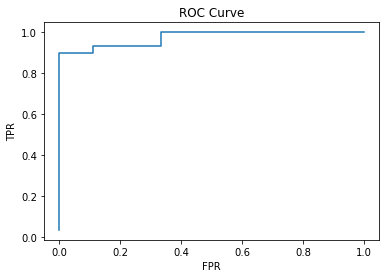

In [267]:
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [268]:
print(f"F1 score is {f1_score(y_test,positive_binary):.2%}")

F1 score is 91.53%


In [325]:
cv_prdictions = cross_val_predict(rf_classify, X_train_, y_train_, cv = 5)

In [326]:
print(f"CV accuracy = {1-sum(cv_prdictions != y_train_)/ len(y_train_):.2%}")

CV accuracy = 87.42%


# Feature Importance

In [304]:
cols = np.array(x_all.columns)

In [305]:
sorted_feature_importances  = np.argsort(rf_classify.feature_importances_)[::-1]

In [319]:
ranked_feature_importances = rf_classify.feature_importances_[sorted_feature_importances]

In [320]:
cols[sorted_feature_importances]

array(['Total Raised', 'Last Financing Size', 'Employees',
       'Majestic Referring Domains', 'company_id', 'Size Multiple',
       'Twitter Followers', 'Year Founded', 'Growth Rate',
       'Facebook Likes', 'emotional_range_big5', 'joy', 'disgust',
       'HQ_post_code', 'sadness', 'analytical', 'anger', 'fear',
       'extraversion_big5', 'agreeableness_big5', 'openness_big5',
       'conscientiousness_big5', 'tentative', 'confident',
       'Application Software', 'Social/Platform Software',
       'Human Capital Services', 'Real Estate Services (B2C)',
       'Information Services (B2C)', 'Internet Retail',
       'Electronics (B2C)', 'Therapeutic Devices', 'Database Software',
       'Movies, Music and Entertainment', 'Leisure Facilities',
       'Broadcasting, Radio and Television',
       'Business/Productivity Software',
       'Application Specific Semiconductors', 'Aerospace and Defense',
       'Other Commercial Services', 'Social Content',
       'Communication Software'

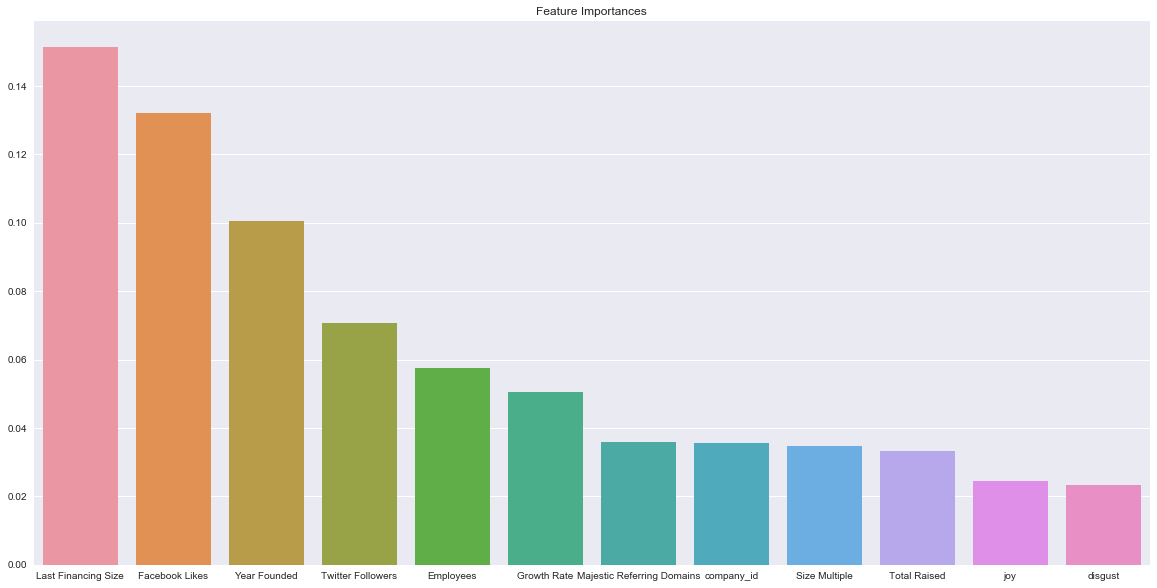

In [321]:
plt.figure(figsize=(20,10))
sns.barplot(cols[np.argsort(sorted_feature_importances)][:12],ranked_feature_importances[:12] )
plt.title("Feature Importances");

# Auto SKLEARN to find the best model